In [1]:
# Acessar ao Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Verifique o conteúdo da pasta "My Drive" para confirmar o nome correto da pasta
drive_path = '/content/drive/My Drive'
folders = os.listdir(drive_path)
print("Pastas disponíveis em My Drive:", folders)

# Navegar até a pasta onde os notebooks estão e exibir os arquivos
notebooks_folder = '/content/drive/My Drive/Colab Notebooks'  # Ajuste o caminho se necessário
notebooks = os.listdir(notebooks_folder)
print("Notebooks encontrados:", notebooks)



Pastas disponíveis em My Drive: ['Documentos Doutorado', 'Colab Notebooks', '1. Apresentações', 'Apresentação 3 Inteligencia Computacional_Raimundo Lucivaldo.pptx']
Notebooks encontrados: ['8090459', '8090563', 'mm_071800q6524', 'APLICAÇÃO MODELO']


In [ ]:
# Caminho para a subpasta
notebooks_folder = '/content/drive/My Drive/Colab Notebooks/8090563'  # Ajuste conforme necessário

# Liste os notebooks dentro dessa subpasta
notebooks = os.listdir(notebooks_folder)
print("Notebooks encontrados:", notebooks)


Notebooks encontrados: ['20abr2025_LSTM_GRU_Codajas.ipynb', '29abr2025_MLP_sat_SGC_30d.ipynb', '29abr2025LSTM2_NASA_Cod.ipynb']


In [ ]:
import pandas as pd
#Importar Bases de Dados


# Caminhos dos arquivos CSV
files = {
    "bar.csv": "/content/drive/My Drive/Colab Notebooks/8090459/bar.csv",
    "bjc.csv": "/content/drive/My Drive/Colab Notebooks/8090459/bjc.csv",
    "coa.csv": "/content/drive/My Drive/Colab Notebooks/8090459/coa.csv",
    "cod.csv": "/content/drive/My Drive/Colab Notebooks/8090459/cod.csv",
    "eir.csv": "/content/drive/My Drive/Colab Notebooks/8090459/eir.csv",
    "iau.csv": "/content/drive/My Drive/Colab Notebooks/8090459/iau.csv",
    "lab.csv": "/content/drive/My Drive/Colab Notebooks/8090459/lab.csv",
    "mna.csv": "/content/drive/My Drive/Colab Notebooks/8090459/mna.csv",
    "mnc.csv": "/content/drive/My Drive/Colab Notebooks/8090459/mnc.csv",
    "par.csv": "/content/drive/My Drive/Colab Notebooks/8090459/par.csv",
    "sgc.csv": "/content/drive/My Drive/Colab Notebooks/8090459/sgc.csv",
    "tef.csv": "/content/drive/My Drive/Colab Notebooks/8090459/tef.csv"
}

# Dicionário para armazenar os DataFrames
dataframes = {}

# Tentar carregar todos os arquivos CSV
for file_name, file_path in files.items():
    try:
        df = pd.read_csv(file_path)
        dataframes[file_name] = df
        print(f"{file_name} carregado com sucesso!")
        print(df.head())  # Exibir as primeiras linhas para verificar o conteúdo
    except Exception as e:
        print(f"Erro ao carregar {file_name}: {e}")



bar.csv carregado com sucesso!
   level_0  index      date_m  ALLSKY_SFC_SW_DWN  ALLSKY_KT    T2M  \
0        0      0  2013-01-01               4.09       0.41  25.98   
1        1      1  2013-01-02               4.29       0.43  25.44   
2        2      2  2013-01-03               4.31       0.43  25.67   
3        3      3  2013-01-04               4.76       0.48  25.89   
4        4      4  2013-01-05               5.63       0.56  26.26   

   PRECTOTCORR   RH2M      PS  WS10M   WD10M  
0         5.67  92.12  100.02   0.59  100.88  
1        11.37  95.50  100.00   0.59  219.19  
2         2.46  91.50  100.14   0.75  108.06  
3         2.24  90.50  100.23   0.90   96.06  
4         1.77  88.69  100.15   0.91   88.06  
bjc.csv carregado com sucesso!
       date_m  ALLSKY_SFC_SW_DWN  ALLSKY_KT    T2M  PRECTOTCORR   RH2M     PS  \
0  2013-01-01               4.90       0.47  25.03        10.30  92.38  99.80   
1  2013-01-02               5.24       0.50  25.32        10.92  91.69  9

In [ ]:
# Suponha que df_mna seja o DataFrame com os dados carregados
# Selecionar as variáveis de entrada (X) e saída (y)
# X será composto por todas as colunas, exceto a variável alvo (T2M)
X = dataframes['mna.csv'][['ALLSKY_SFC_SW_DWN', 'ALLSKY_KT', 'PRECTOTCORR', 'RH2M', 'PS', 'WS10M', 'WD10M']]  # Exemplo de variáveis de entrada
y = dataframes['mna.csv']['T2M']  # Variável alvo

# Normalizar os dados de entrada
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Reshape para o formato exigido pelo LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Exemplo de construção de modelo LSTM
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Prever um único valor (ex: T2M)
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 729.5811
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 601.6082
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 283.9965
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.6280
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.0446
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.2598
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.9057
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.7750
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.6841
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.9127
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.7752
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.3086
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3888
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.7768
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.8680
E

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Erro Quadrático Médio (MSE): 0.6017013812372882
R² (Coeficiente de Determinação): 0.0001763958642119201


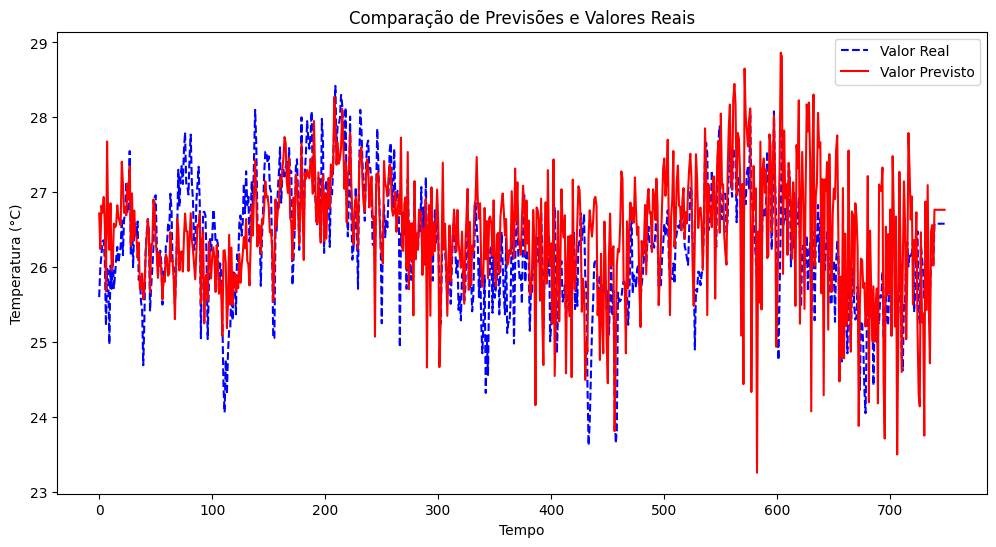

In [ ]:
# Fazer previsões usando o modelo treinado
if 'model' in locals():
  predictions = model.predict(X_test)

  # Calcular o erro (opcional, para verificar a performance)
  from sklearn.metrics import mean_squared_error, r2_score

  # Cálculo do erro quadrático médio (MSE)
  mse = mean_squared_error(y_test, predictions)
  print(f"Erro Quadrático Médio (MSE): {mse}")

  # Cálculo do R2 (coeficiente de determinação)
  r2 = r2_score(y_test, predictions)
  print(f"R² (Coeficiente de Determinação): {r2}")

  # Visualização dos resultados
  import matplotlib.pyplot as plt

  plt.figure(figsize=(12,6))

  # Gráfico de comparação entre os valores reais e as previsões
  plt.plot(y_test.values, color='blue', label='Valor Real', linestyle='--')
  plt.plot(predictions, color='red', label='Valor Previsto')

  # Título e labels
  plt.title('Comparação de Previsões e Valores Reais')
  plt.xlabel('Tempo')
  plt.ylabel('Temperatura (°C)')

  # Adicionar legenda
  plt.legend()

  # Exibir gráfico
  plt.show()
else:
  print("Model not defined. Please ensure the cell that defines and trains the model has been executed.")